<a href="https://colab.research.google.com/github/Himanshu-1703/colab_notebooks/blob/main/Plotting_Gradient_Boost_Regressor_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from pathlib import Path

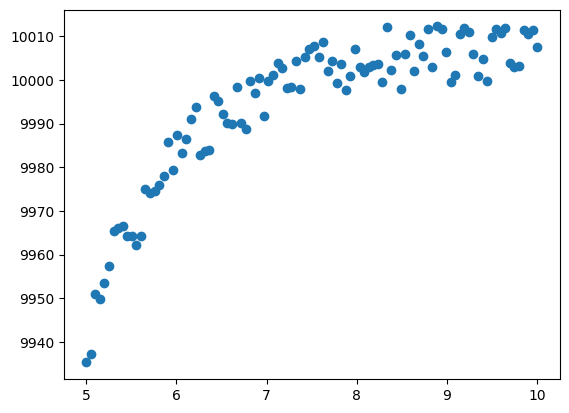

In [3]:
from sklearn.datasets import make_regression

X = np.linspace(5,10,100)

y = ((1 / (1 + np.exp(-X)))*10000) + (np.random.random(size=100)*15)

# plot the data
plt.scatter(X,y)
plt.show()

In [4]:
X.shape

(100,)

In [5]:
! mkdir plots

In [11]:
class GradientBoostRegressor:
    def __init__(self,n_estimators):
        self.n_estimators = n_estimators
        self.base_estimators = []

    def calculate_pseudo_residuals(self,y_actual,y_predicted):
        return y_actual - y_predicted

    def plot_residuals(self,X,prev_predictions,y,residuals_name):
        fig = plt.figure(figsize=(12,6))
        plt.title(f'Residual plot for {residuals_name}')
        plt.xlabel('X')
        plt.ylabel('residuals')
        plt.vlines(X,ymin=0,ymax=y - prev_predictions,label=residuals_name)
        plt.scatter(X,y-prev_predictions,marker='D',s=30)
        return fig


    def plot_model(self,model_name,X,y):
        fig = plt.figure(figsize=(12,5))
        plt.scatter(X,y)
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title(f'Plotting {model_name} on data')
        plt.legend()
        return fig

    def fit(self,X,y):
        ind = 0
        mean_model = np.mean(y)

        # add the model to model list
        self.base_estimators.append(mean_model)

        # name of the model
        model_name = f'f{ind}(x)'

        # plot the model
        fig_mean = self.plot_model(model_name,X,y)
        plt.axhline(y=mean_model,color='red',label=f'{model_name}')

        # save the model
        fig_mean.savefig(f'plots/{model_name}_plot.png')

        #calculate the residuals
        residuals = self.calculate_pseudo_residuals(y,mean_model)
        predictions = mean_model

        for model in range(self.n_estimators):
            decision_tree_model = DecisionTreeRegressor(max_depth=2)

            # fit the model on data
            decision_tree_model.fit(X.reshape(-1,1),residuals)

            # add the model to model list
            self.base_estimators.append(decision_tree_model)

            # predictions from the decision tree model
            predictions_dt = decision_tree_model.predict(X.reshape(-1,1))
            dt_model_name = f'h{ind+1}x'

            # plot the residuals
            fig_mean = self.plot_residuals(X,predictions,y,f'residuals {ind}')

            # plot the decision tree
            plt.plot(X,predictions_dt,linestyle='--',color='red',label=dt_model_name)
            plt.legend()
            fig_mean.savefig(f'plots/residuals{ind}_plot.png')

            # update the predictions
            predictions += predictions_dt
            ind += 1

            # name of the ensemble
            model_name = f'f{ind}(x)'

            # plot the prediction plot
            fig_ensemble = self.plot_model(model_name,X,y)
            plt.plot(X,predictions,label=model_name,color='red')
            plt.legend()
            fig_ensemble.savefig(f'plots/{model_name}_plot.png')

            # calculate the residuals for the ensemble
            residuals = self.calculate_pseudo_residuals(y,predictions)


    def predict(self,X):
        prediction = 0
        for ind,model in enumerate(self.base_estimators):
            if ind == 0:
                prediction += model
            else:
                prediction += model.predict(X)
        return prediction



<ipython-input-11-e2db7be6c6c1>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(12,5))


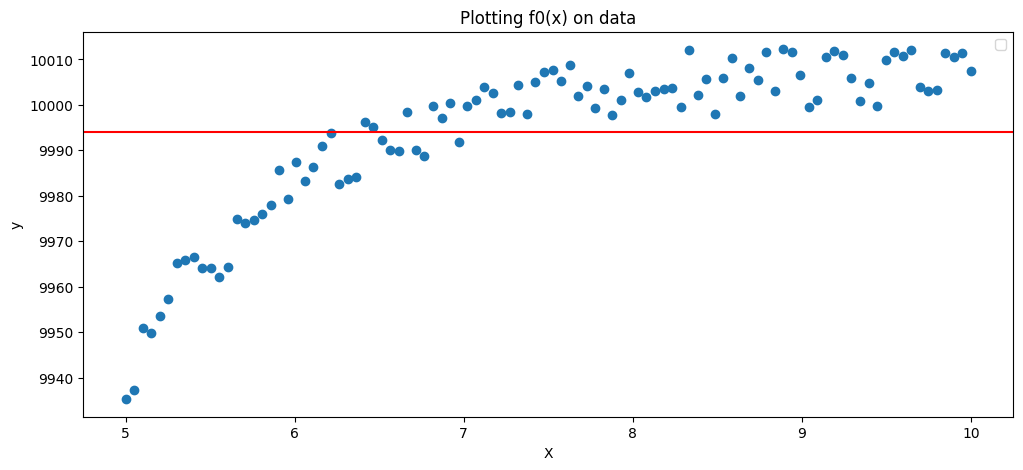

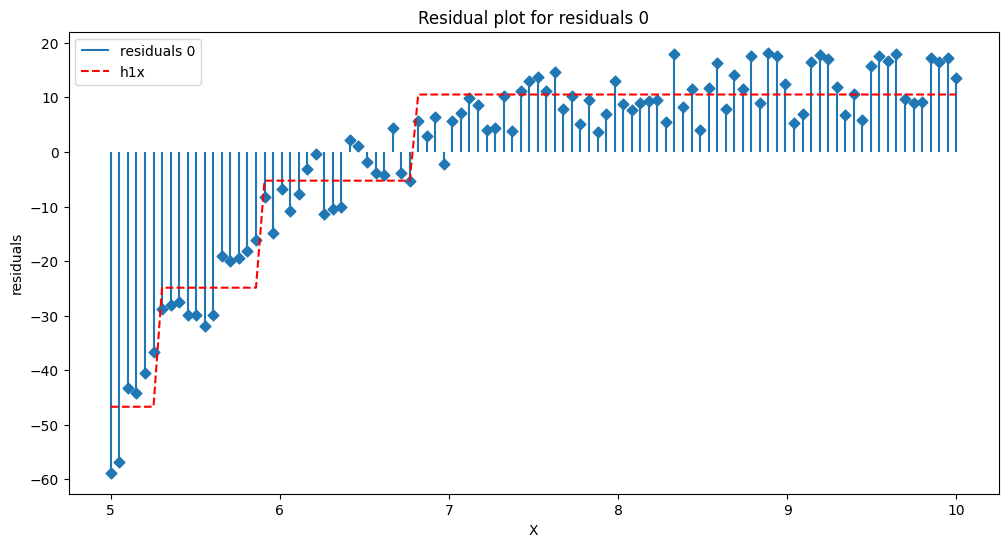

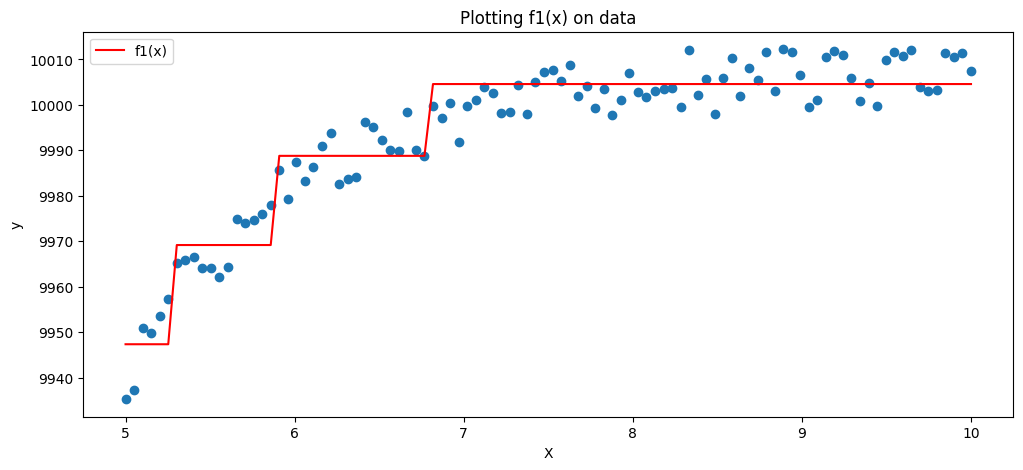

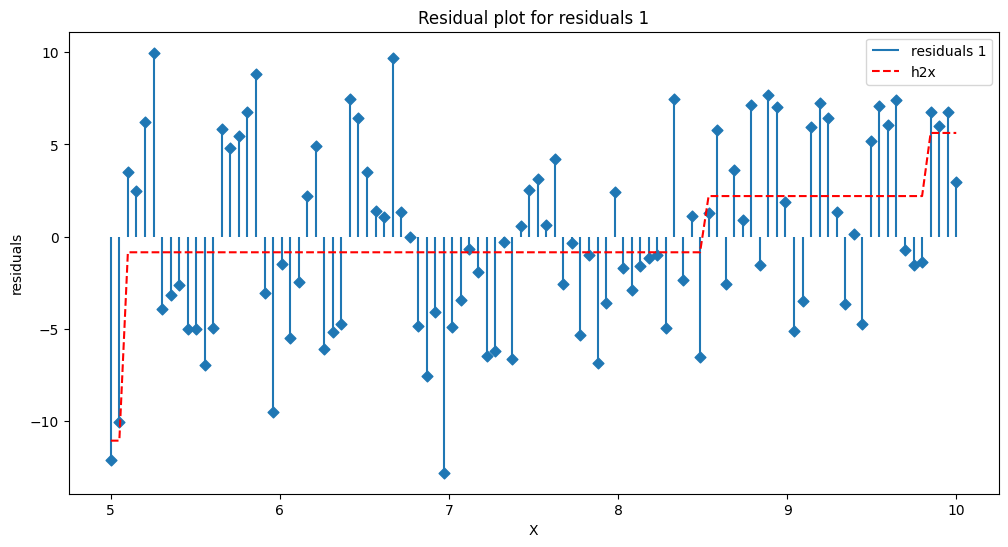

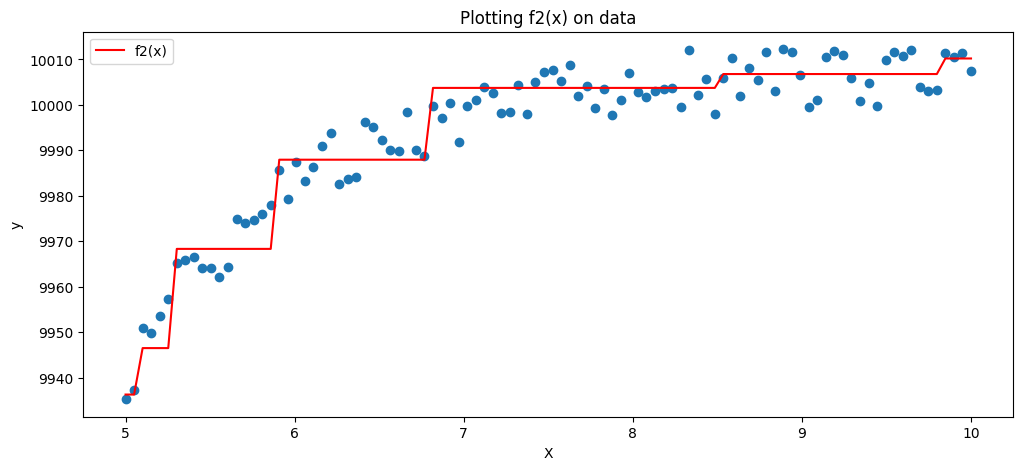

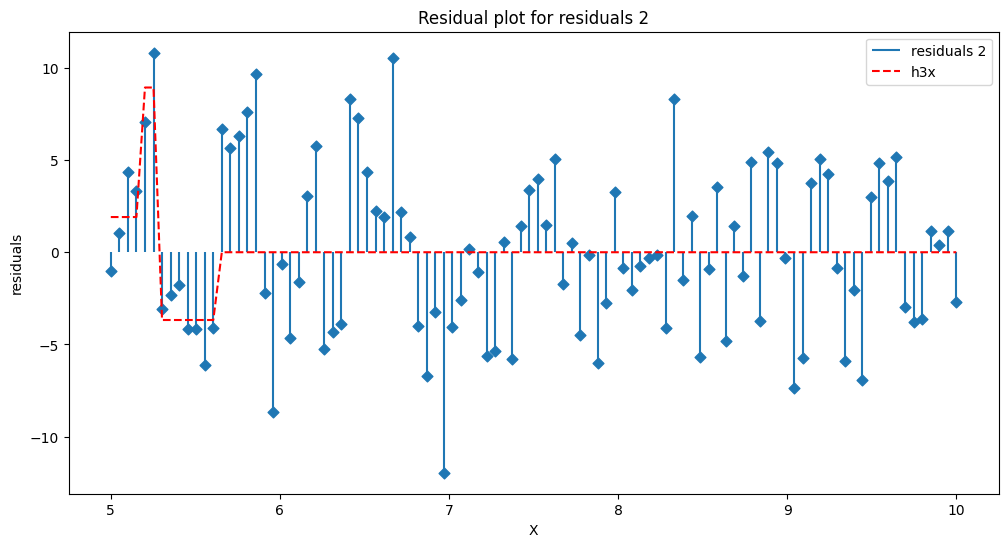

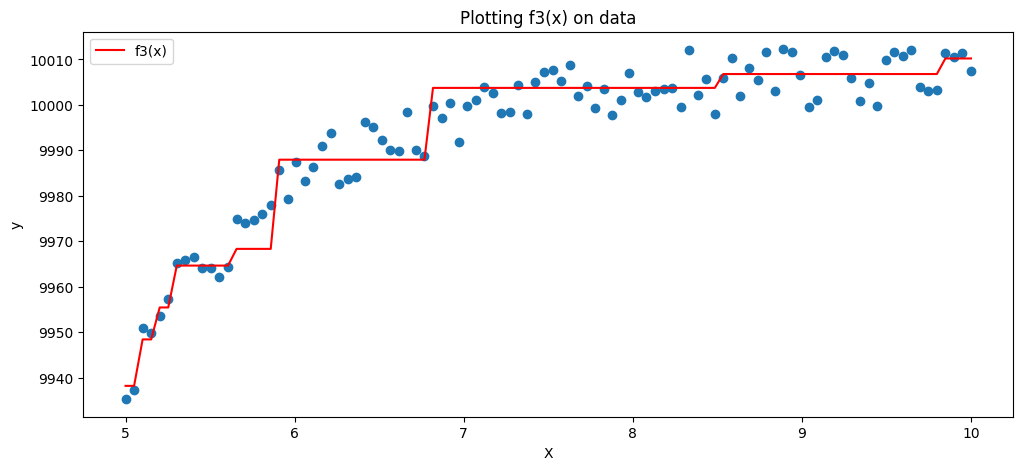

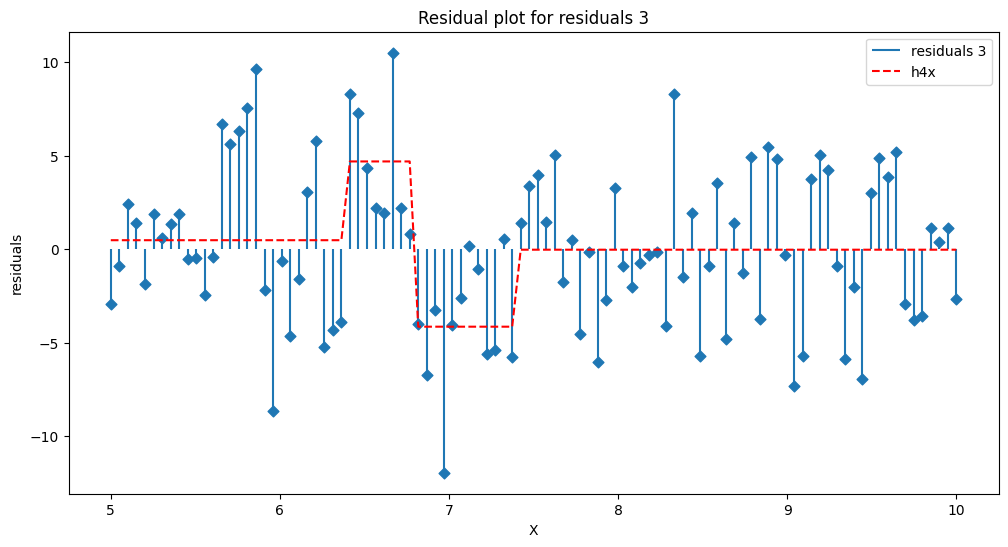

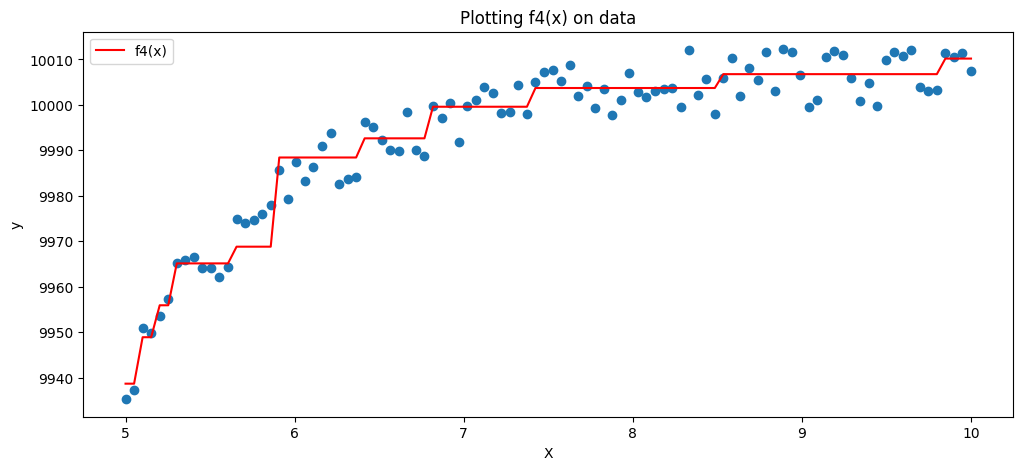

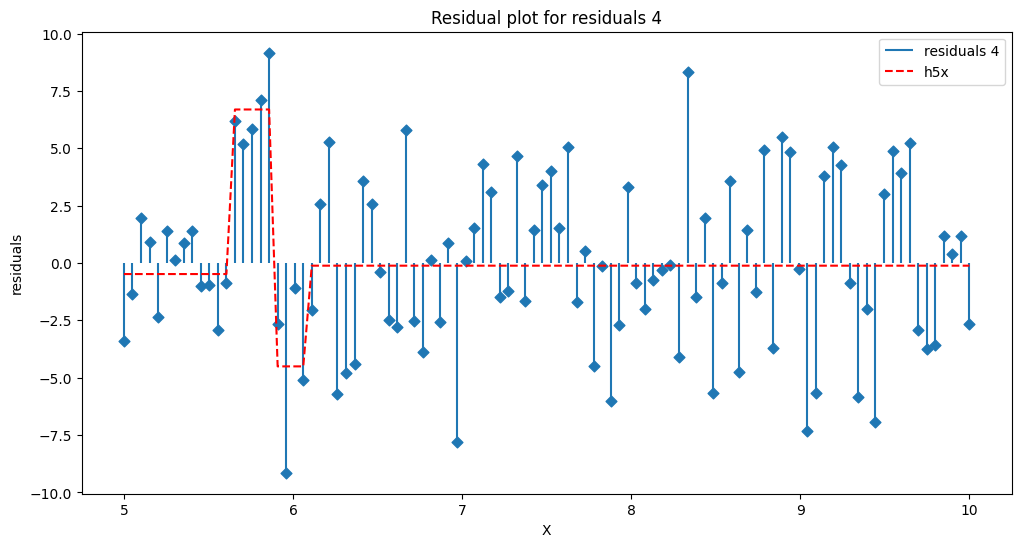

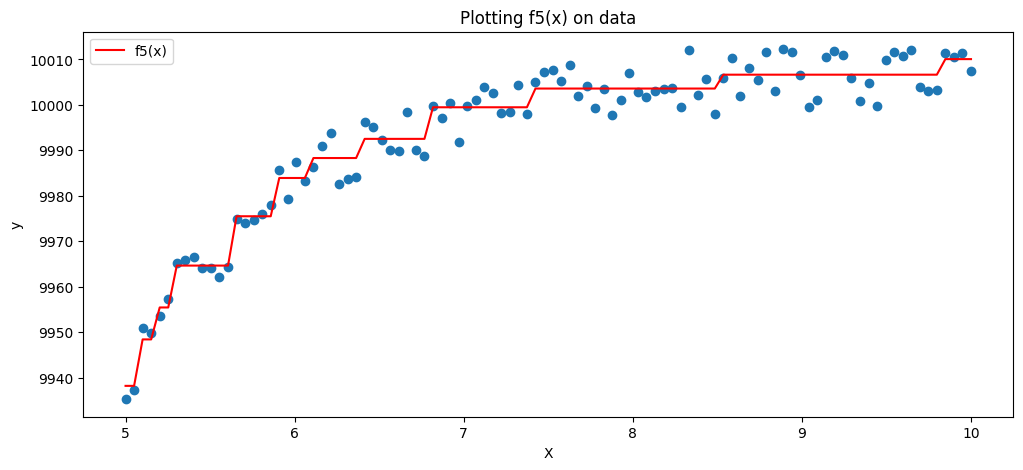

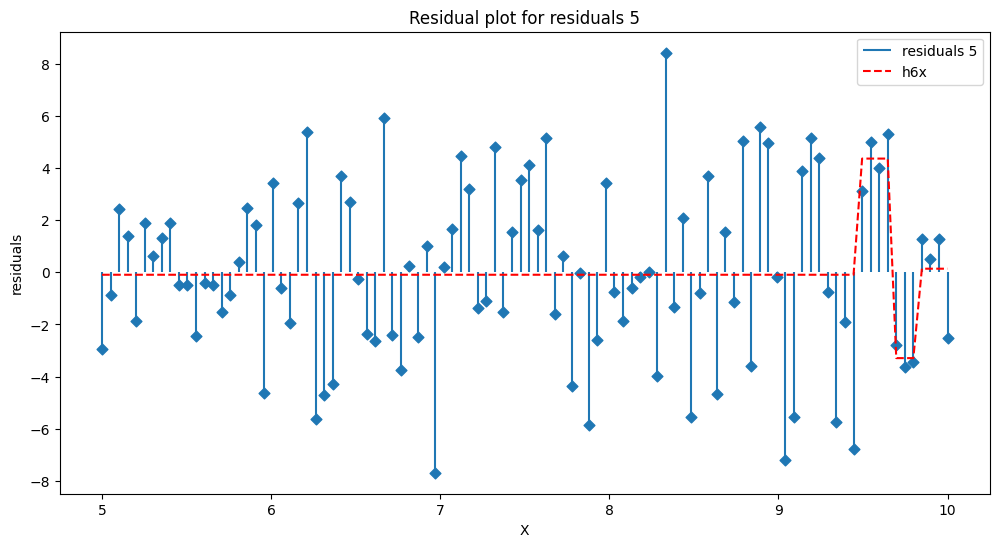

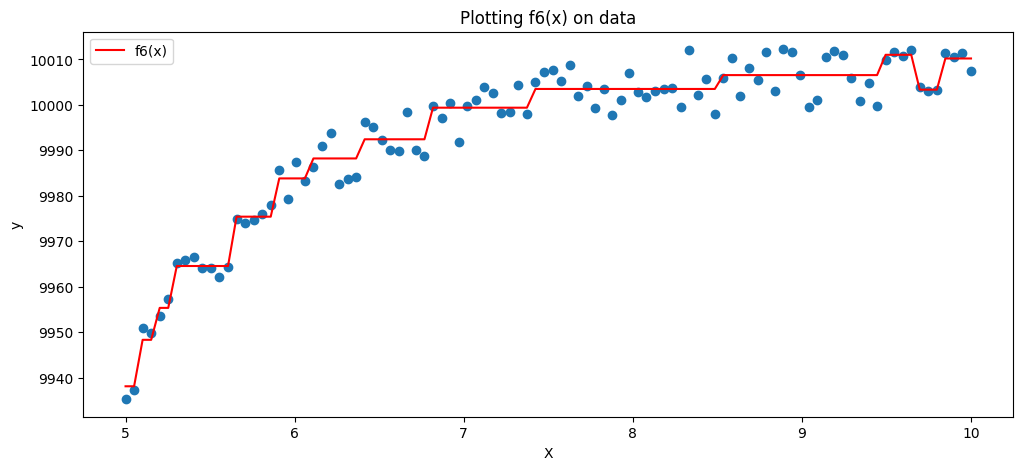

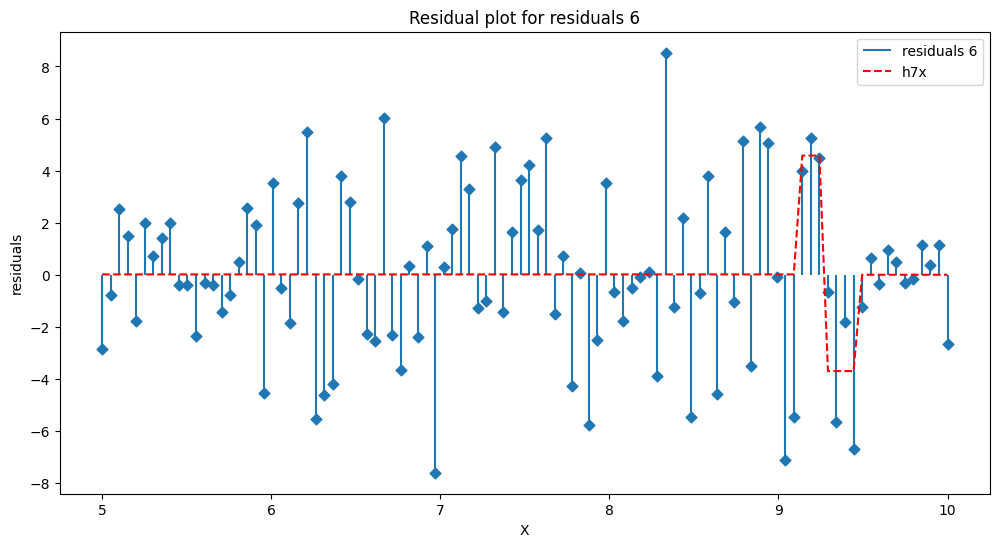

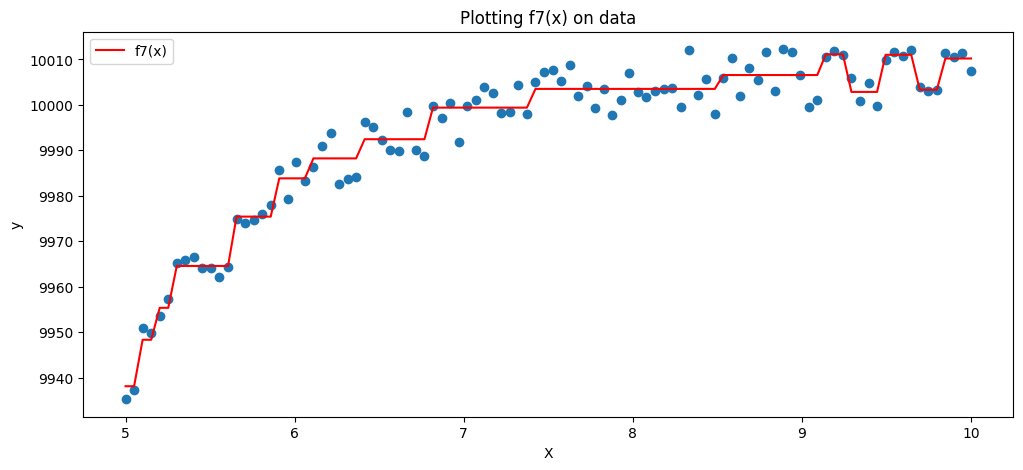

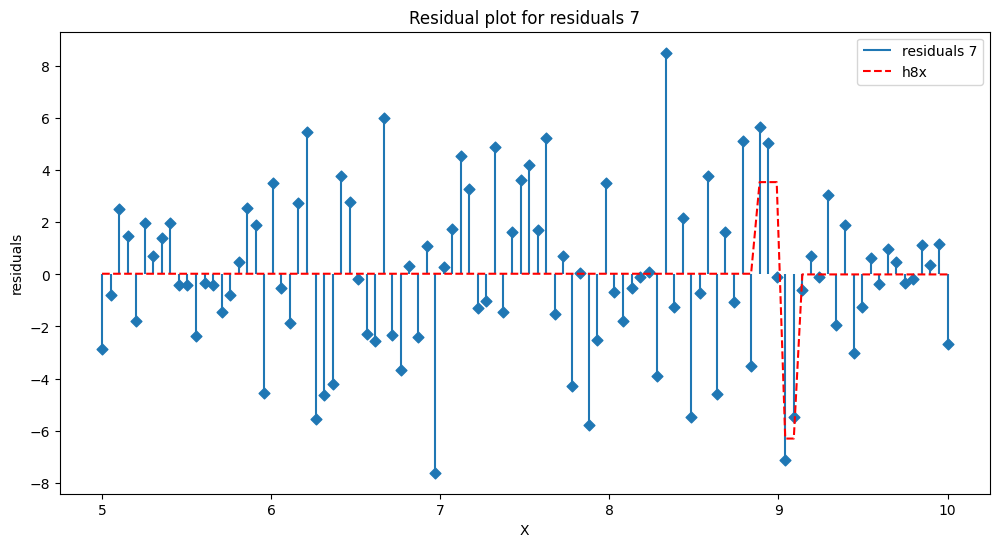

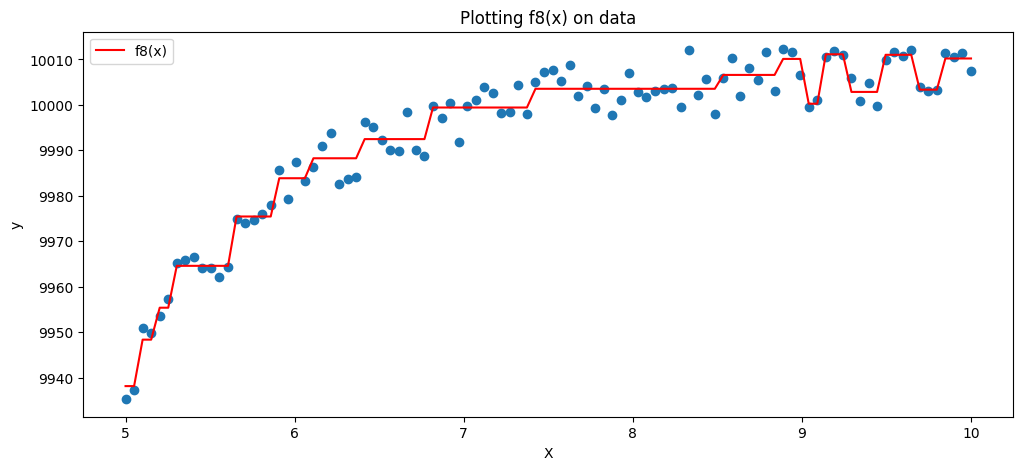

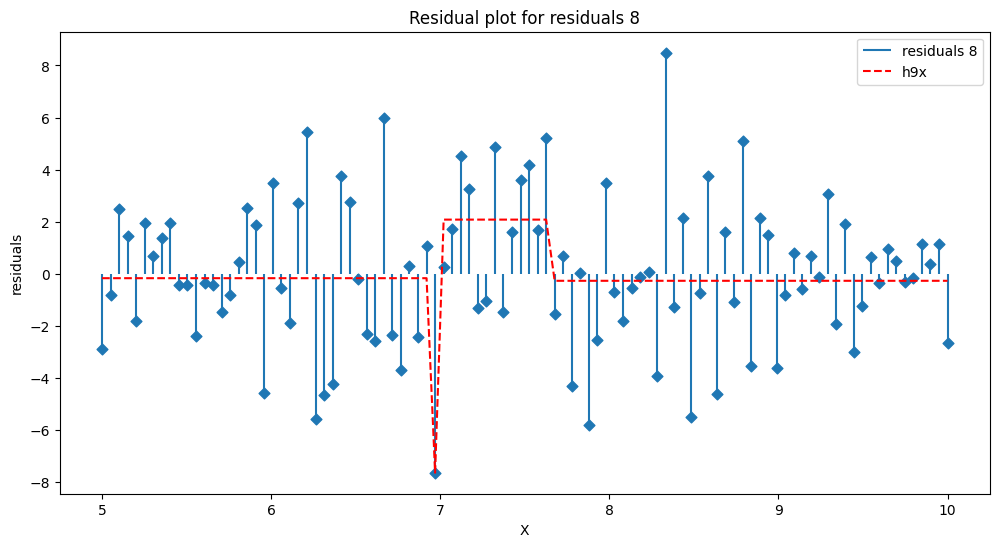

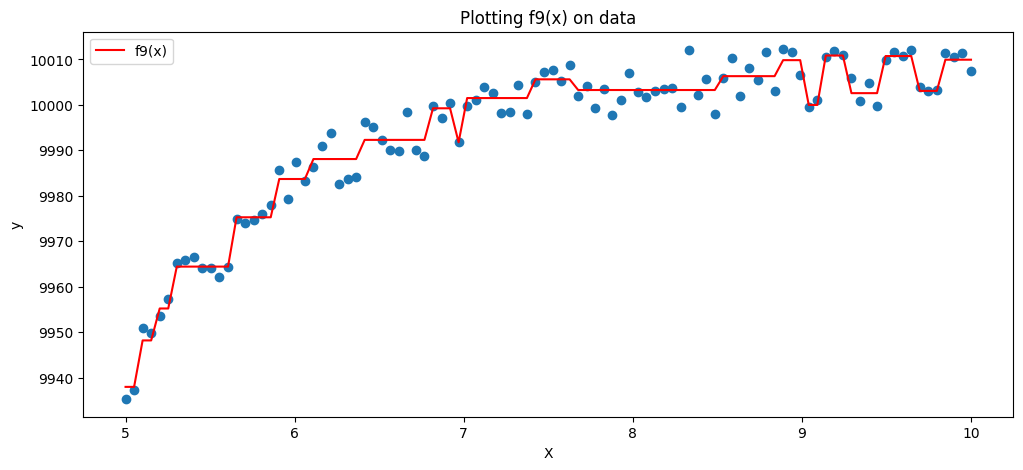

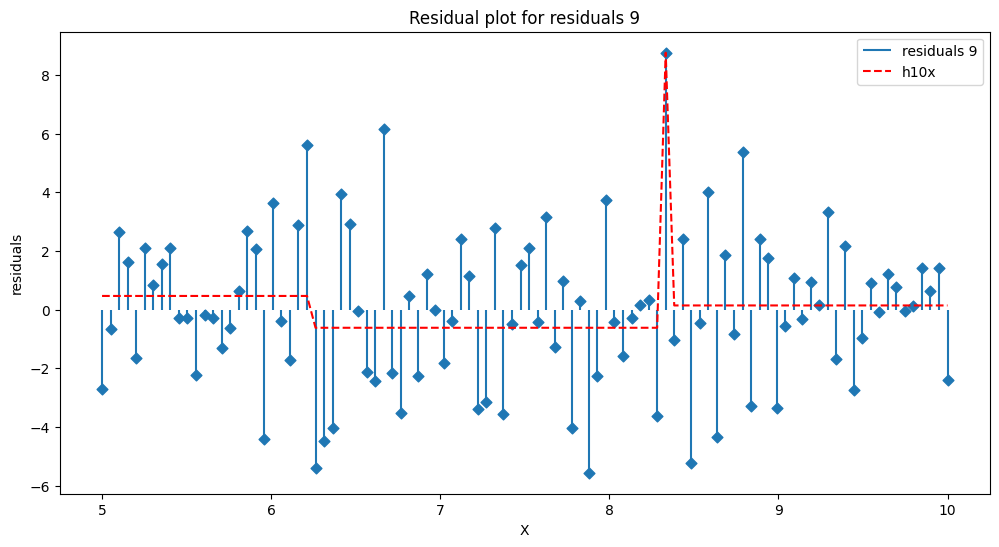

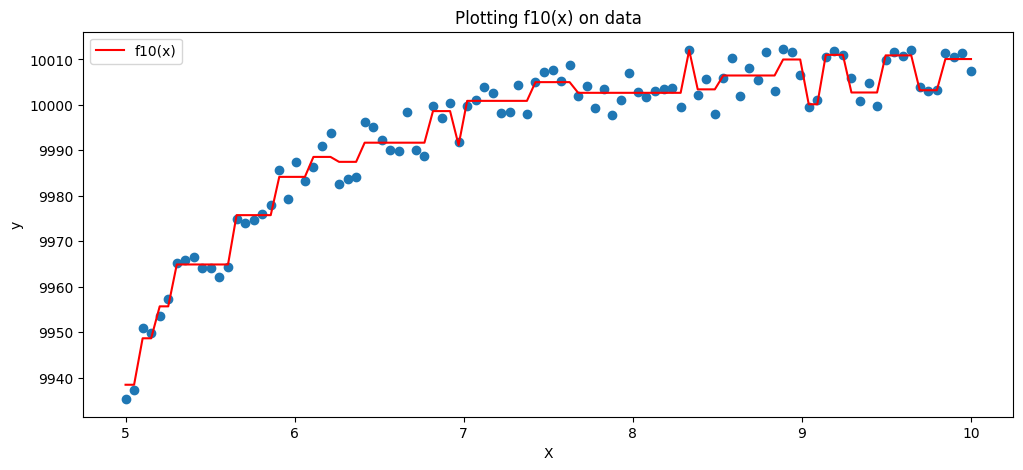

In [12]:
# make the gbr object with 10 trees
gbr = GradientBoostRegressor(10)

# fit the model
gbr.fit(X,y)

# predict on X
predictions = gbr.predict(X.reshape(-1,1))

In [13]:
# calculate the r2 score
from sklearn.metrics import r2_score

r2_score(y,predictions)

0.980569618835551